In [0]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

In [0]:
N  = 100
k = 7
#задание координат (x, y) узлов графа
G = nx.empty_graph(N)
coordinates = nx.random_layout(G) 
x, y = zip(*coordinates.values())
#создание связей между узлами
for node in G.nodes():
    distances = np.sqrt(np.power(x[node]-x, 2) + np.power(y[node]-y, 2))
    probabilities = distances/distances.sum()
    connect_to = np.random.choice(G.nodes(), size=k, p=probabilities, replace=False)
    edges = [(node, adj_node) for adj_node in connect_to]
    G.add_edges_from(edges)

In [0]:
#Функция визуализации распределения степеней узлов графа. 
#При normalize=True по оси ординат будет показываться вероятность данной степени, иначе - ее частота. 
#log_y и log_x - отобразить ли ось ординат и абсцисс соответсвенно в логарифмическом масштабе
def plot_degree_distribution(degrees, frequency, normalize=True, log_y=False, log_x=False):
    if normalize == True:
        y = frequency/frequency.sum()
        ylab = 'probability'
    else:
        y = frequency
        ylab = 'frequency'           
    if log_y == True:
        y = np.log(y)
        ylab = 'ln({})'.format(ylab)
    
    if log_x == True:
        x = np.log(degrees)
        xlab = 'ln(degree)'
    else:
        x = degrees
        xlab = 'degree'
        
    plt.plot(x, y, 'ro')
    plt.xlabel(xlab)
    plt.ylabel(ylab)
    plt.title('Degree distribution')

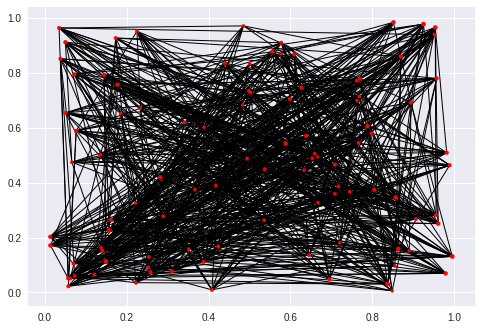

In [4]:
#Визуализация графа
nx.draw_networkx(G, pos=coordinates, with_labels=False, node_size=[deg for deg in dict(nx.degree(G)).values()])
plt.show()

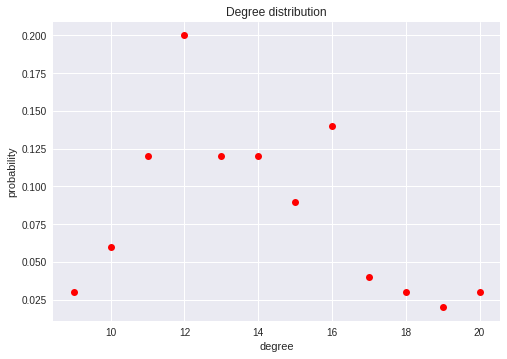

In [5]:
#Визуализация распределения степеней узлов
degrees_list = sorted(list(set(dict(nx.degree(G)).values())))
degrees_count = [list(dict(nx.degree(G)).values()).count(deg) for deg in degrees_list]
plot_degree_distribution(np.array(degrees_list), np.array(degrees_count), True, False, False)
plt.show()